## Pre-Processing Part

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../input/term-deposit-marketing-2020.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


### 1-) Categorical EDA
#### Distribution of Categorical Features

In [120]:
for col in data.select_dtypes(include="object").columns:
    print('column :', col)
    print('values :' , data[col].unique())

column : job
values : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
column : marital
values : ['married' 'single' 'divorced']
column : education
values : ['tertiary' 'secondary' 'unknown' 'primary']
column : default
values : ['no' 'yes']
column : housing
values : ['yes' 'no']
column : loan
values : ['no' 'yes']
column : contact
values : ['unknown' 'cellular' 'telephone']
column : month
values : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
column : y
values : ['no' 'yes']


-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
unique values of categorical feature :job
 blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64


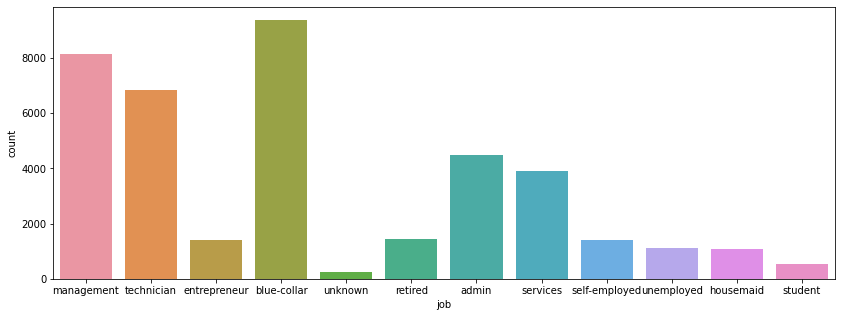

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
unique values of categorical feature :marital
 married     24386
single      10889
divorced     4725
Name: marital, dtype: int64


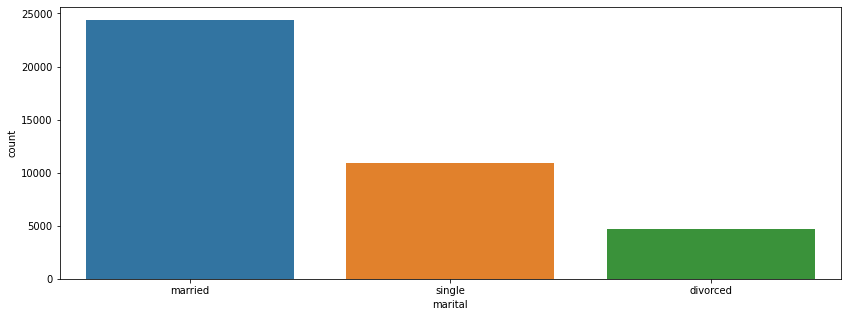

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
unique values of categorical feature :education
 secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64


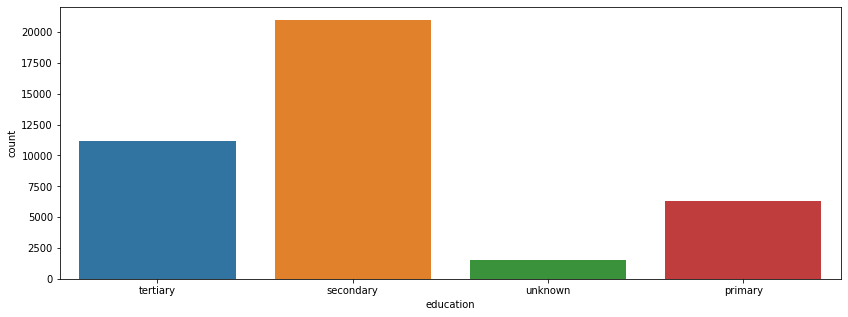

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
unique values of categorical feature :default
 no     39191
yes      809
Name: default, dtype: int64


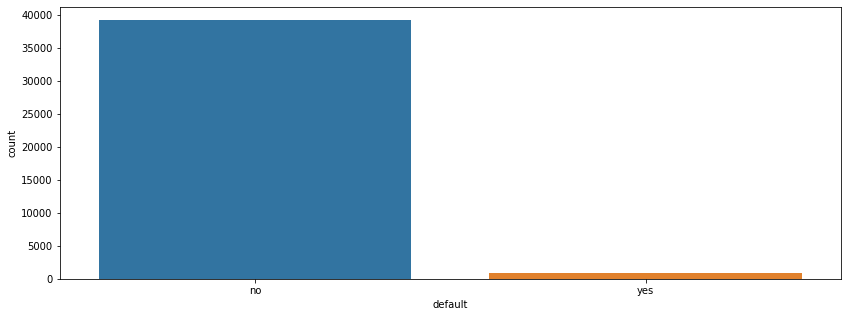

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
unique values of categorical feature :housing
 yes    24031
no     15969
Name: housing, dtype: int64


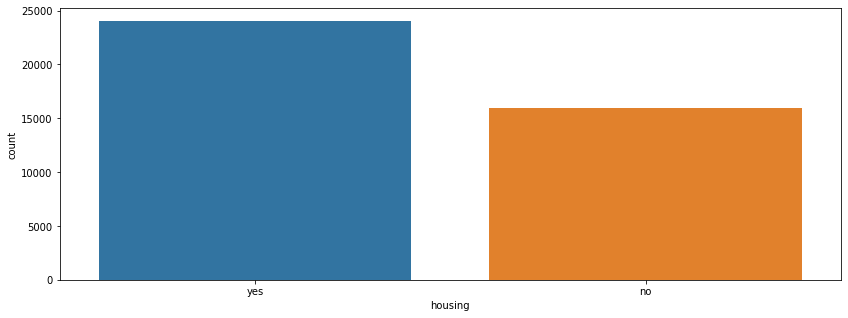

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
unique values of categorical feature :loan
 no     33070
yes     6930
Name: loan, dtype: int64


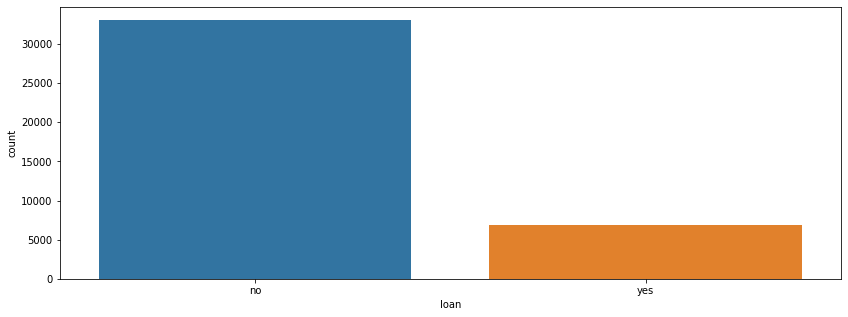

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
unique values of categorical feature :contact
 cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64


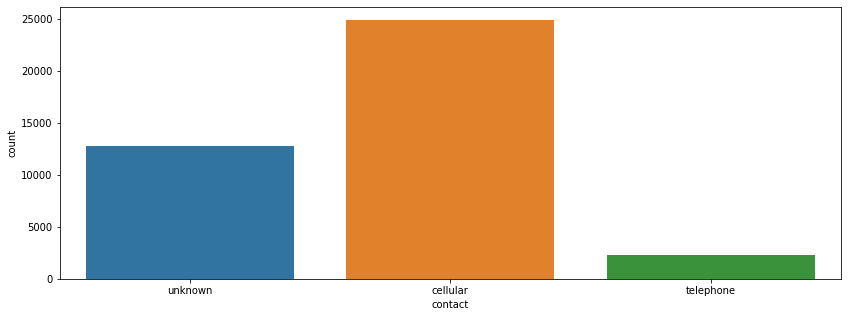

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
unique values of categorical feature :month
 may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: month, dtype: int64


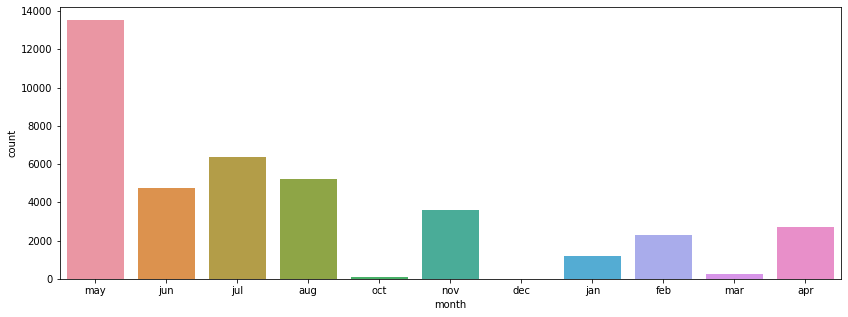

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
unique values of categorical feature :y
 no     37104
yes     2896
Name: y, dtype: int64


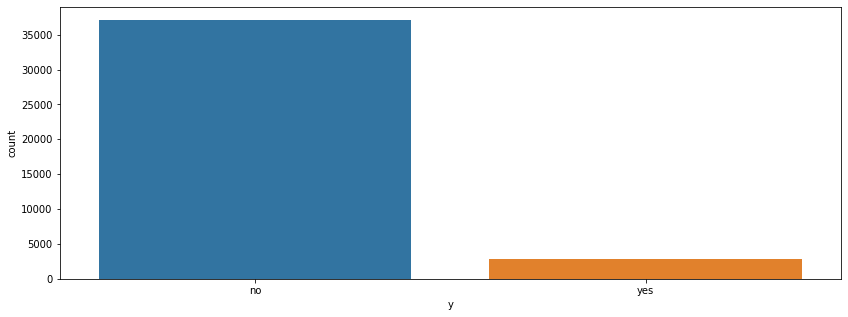

In [107]:
def category(feature):
    print("-*-"*40)
    print("unique values of categorical feature :{}\n".format(feature) ,data[feature].value_counts())
    plt.figure(figsize= (14,5))
    sns.countplot(data[feature])
    plt.show();
    
category_list = ["job","marital","education","default","housing","loan","contact","month", "y"]

for i in category_list:
    category(i)

 - **default** feature seems to be does not play important role for data set.

#### Relationship between categorical features and label

In [108]:
for categorical_feature in category_list:
    print(data.groupby(['y', categorical_feature]).size())

y    job          
no   admin            4132
     blue-collar      8848
     entrepreneur     1317
     housemaid        1034
     management       7490
     retired          1286
     self-employed    1302
     services         3672
     student           442
     technician       6355
     unemployed       1008
     unknown           218
yes  admin             351
     blue-collar       535
     entrepreneur       88
     housemaid          53
     management        676
     retired           151
     self-employed     112
     services          238
     student            82
     technician        497
     unemployed         96
     unknown            17
dtype: int64
y    marital 
no   divorced     4334
     married     22908
     single       9862
yes  divorced      391
     married      1478
     single       1027
dtype: int64
y    education
no   primary       5917
     secondary    19575
     tertiary     10177
     unknown       1435
yes  primary        353
     secondary     1

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


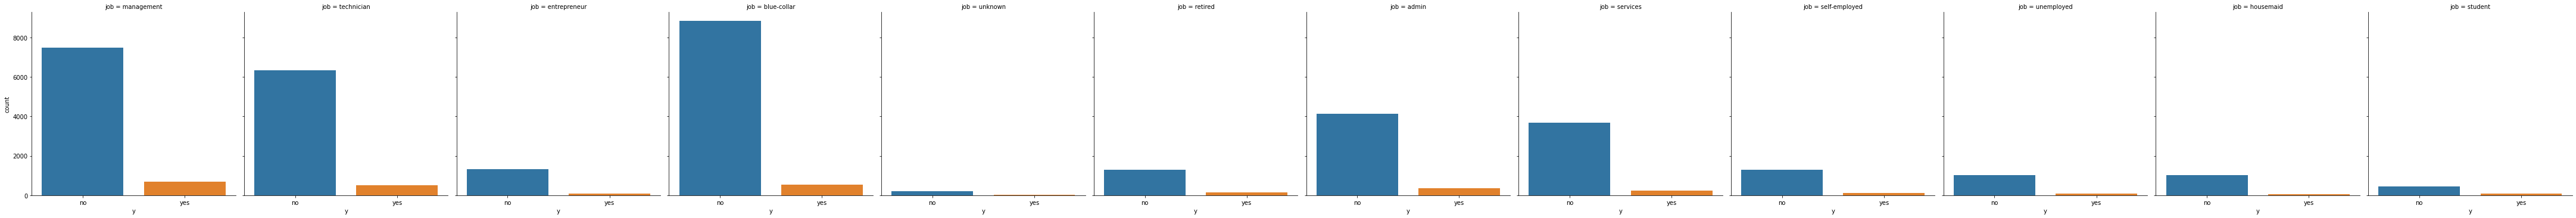

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


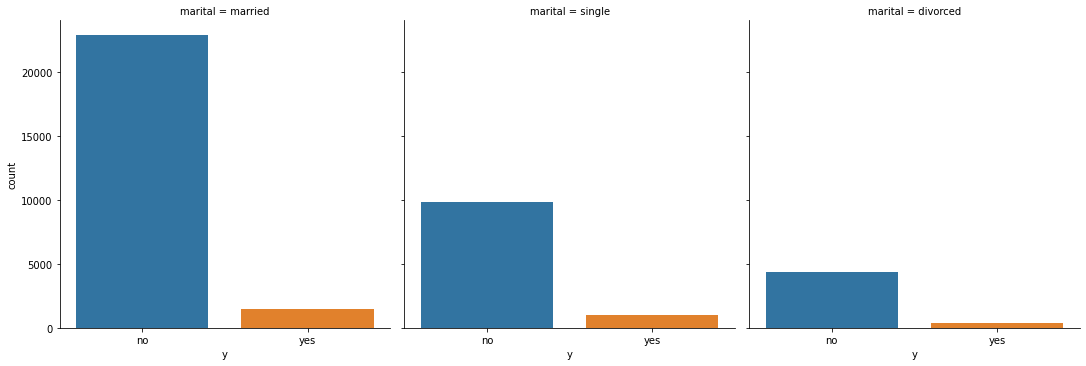

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


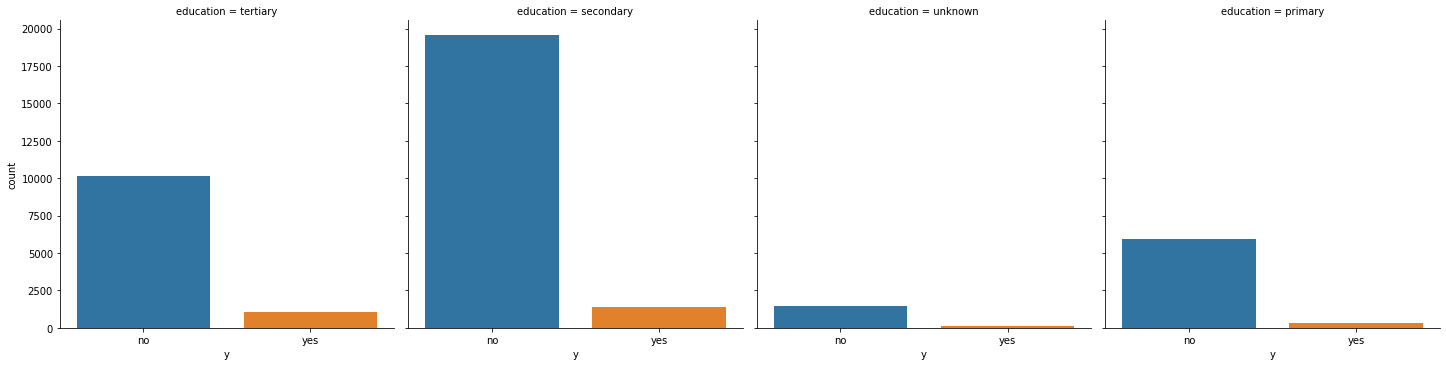

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


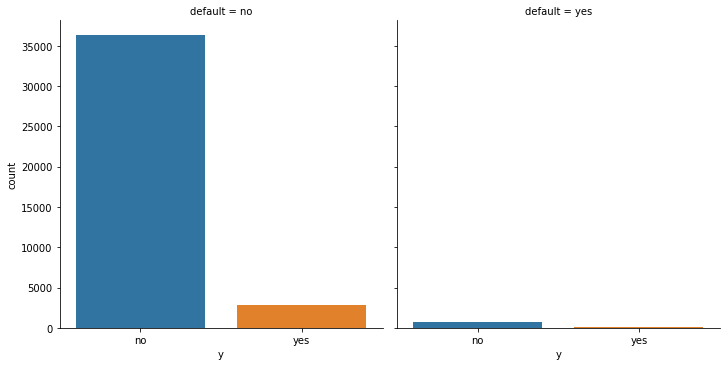

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


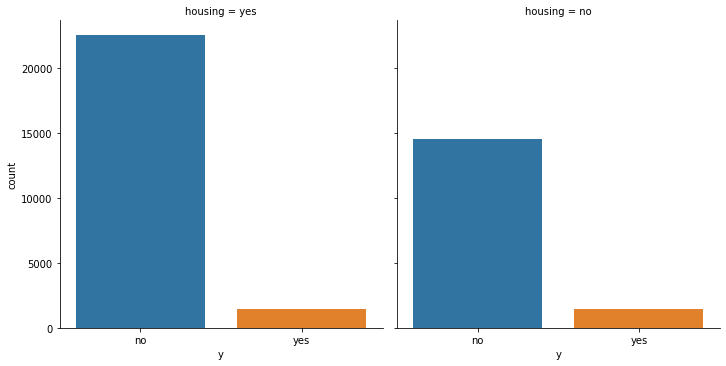

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


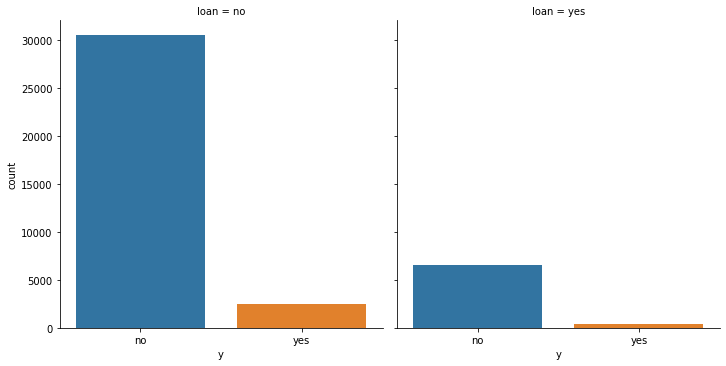

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


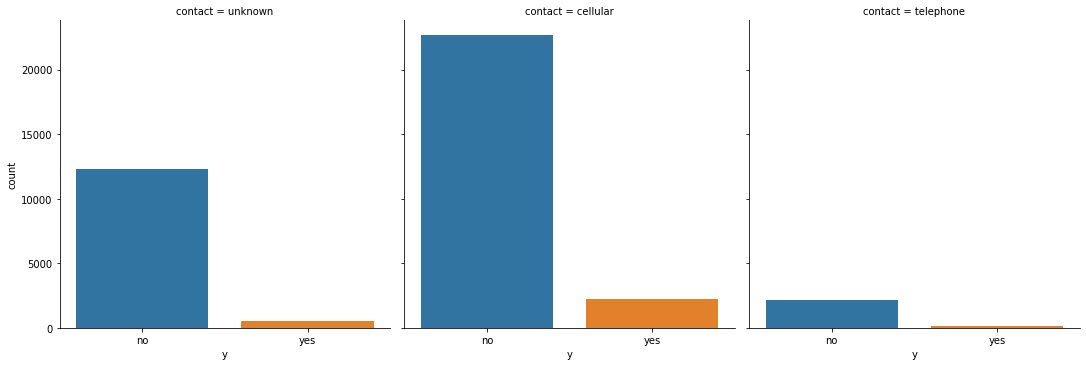

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


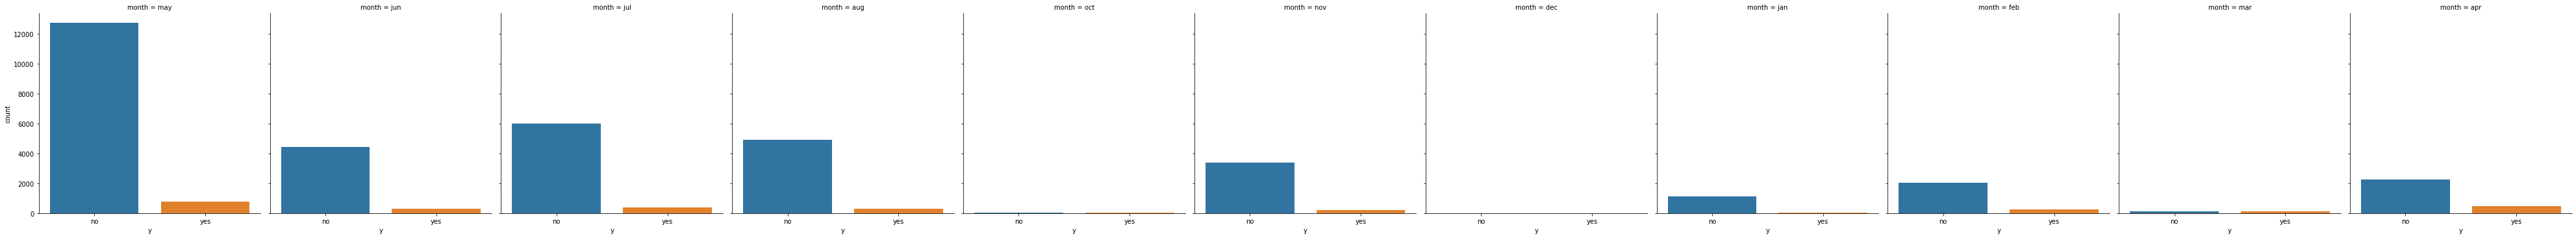

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


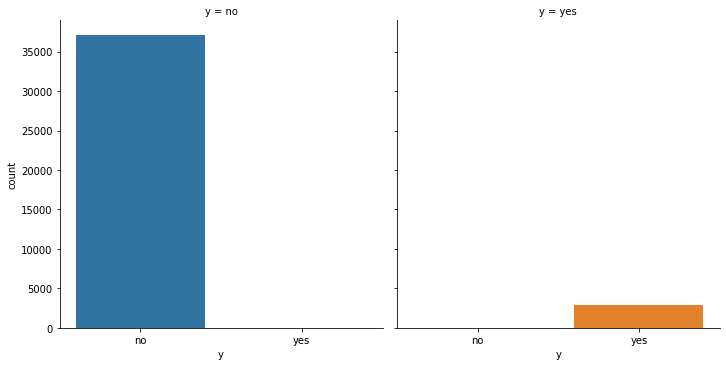

In [113]:
for categorical_feature in category_list:
    sns.catplot(x ='y', col = categorical_feature , kind = 'count', data=data)
    print("-*-"*40)
    plt.show()    

### 2-) Numerical EDA
#### Distribution of Numerical Features

In [121]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


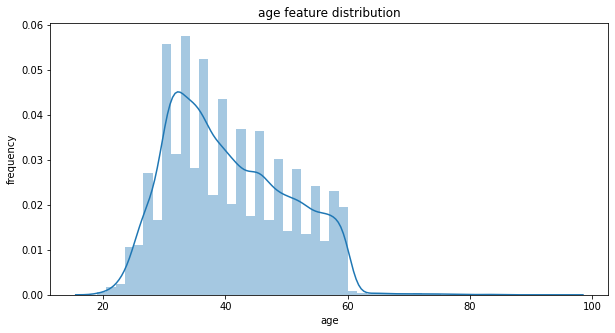

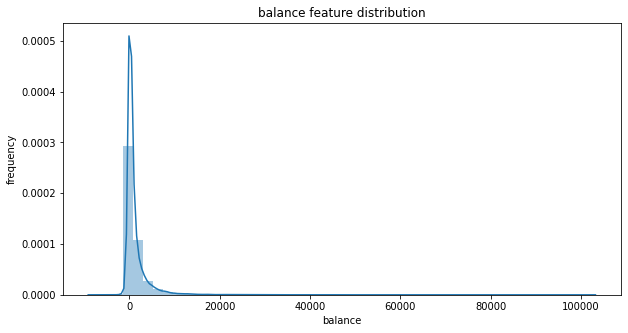

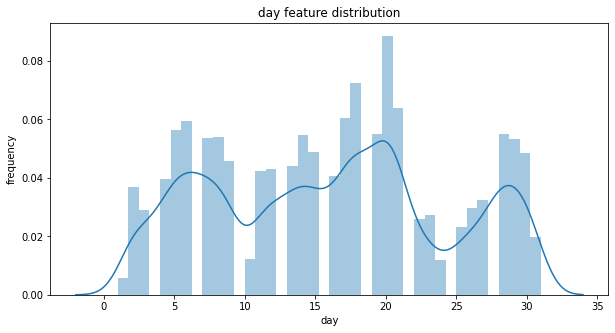

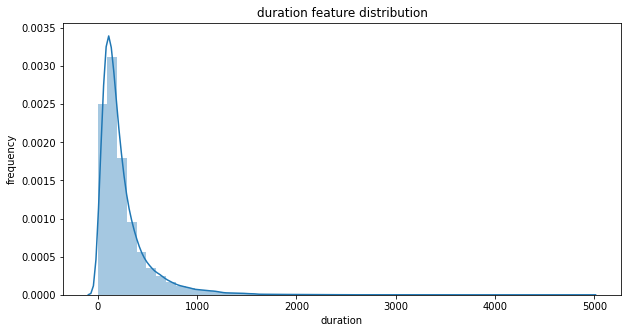

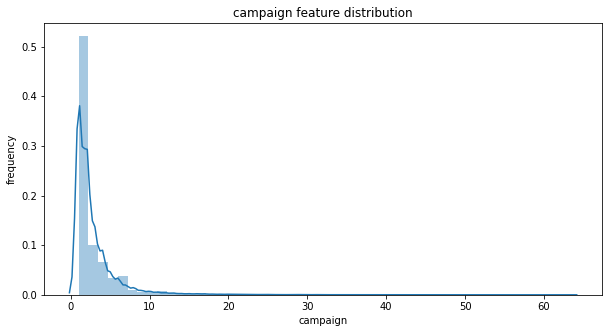

In [118]:
def numeric(feature):
    plt.figure(figsize= (10,5))
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("frequency")
    plt.title("{} feature distribution".format(feature))
    plt.show();
    
numeric_list = ["age","balance","day","duration","campaign"]

for i in numeric_list:
    numeric(i)

#### Cheking correlations between numerical features

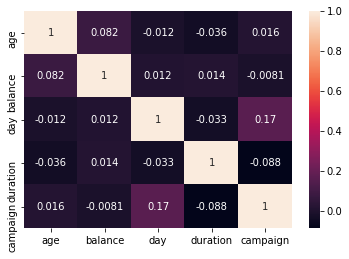

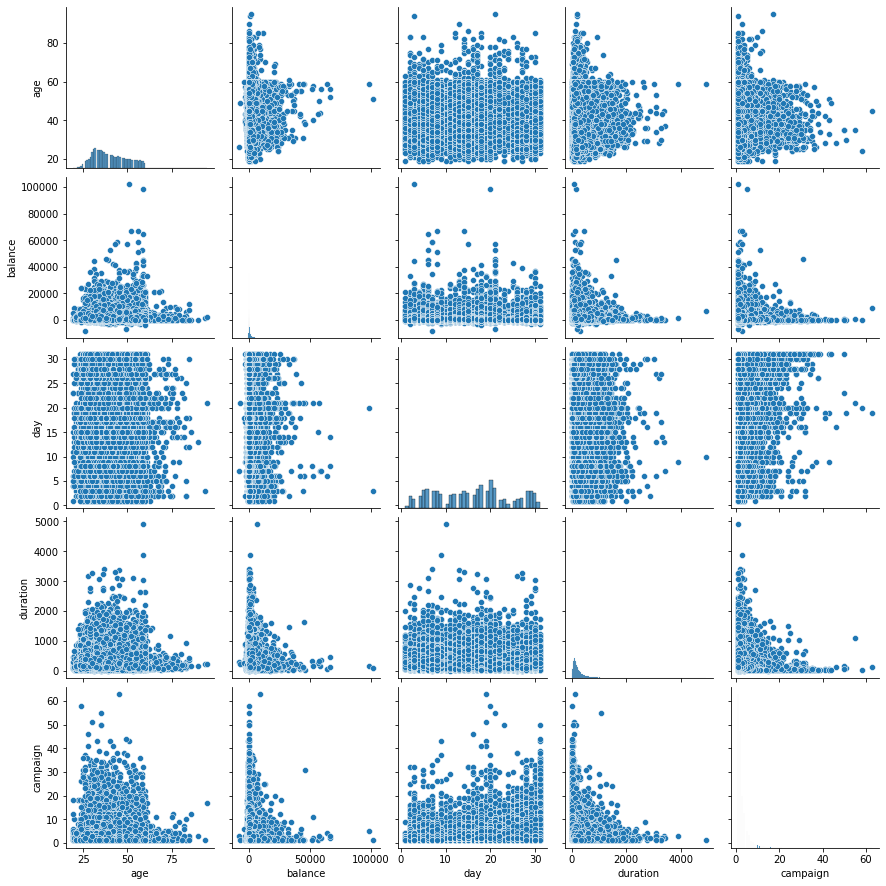

In [20]:
data.corr()
df = data.corr()
sns.heatmap(df, annot=True)
sns.pairplot(data);

- seems to be no heavily correalations with each other

#### Relationship between numeric features and label

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
age feature impact on label :

y
no     40.599208
yes    39.844959
Name: age, dtype: float64


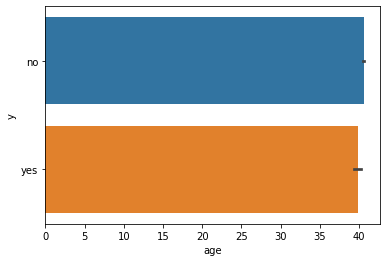

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
balance feature impact on label :

y
no     1249.752533
yes    1588.495856
Name: balance, dtype: float64


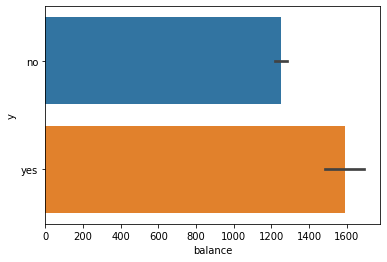

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
day feature impact on label :

y
no     16.032072
yes    15.827003
Name: day, dtype: float64


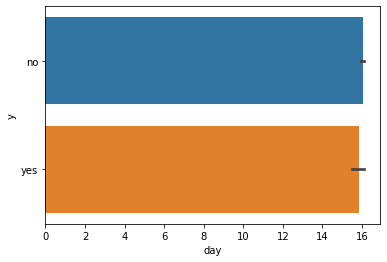

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
duration feature impact on label :

y
no     221.408042
yes    682.958564
Name: duration, dtype: float64


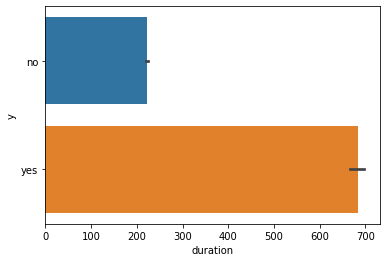

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
campaign feature impact on label :

y
no     2.918688
yes    2.414365
Name: campaign, dtype: float64


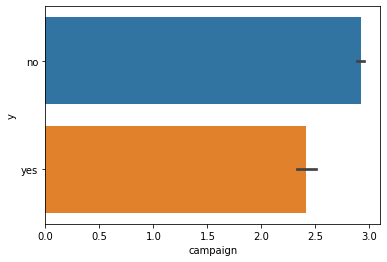

In [103]:
def numeric_impact(feature):
    print("-*-"*40)
    print("{} feature impact on label :\n".format(feature))
    print(data.groupby("y")[feature].mean())
    
    sns.barplot(x = feature, y = "y", data=data)
    plt.show();
    
listt =  ["age","balance","day","duration","campaign"]

for i in listt:
    numeric_impact(i)

#### Defining outliers

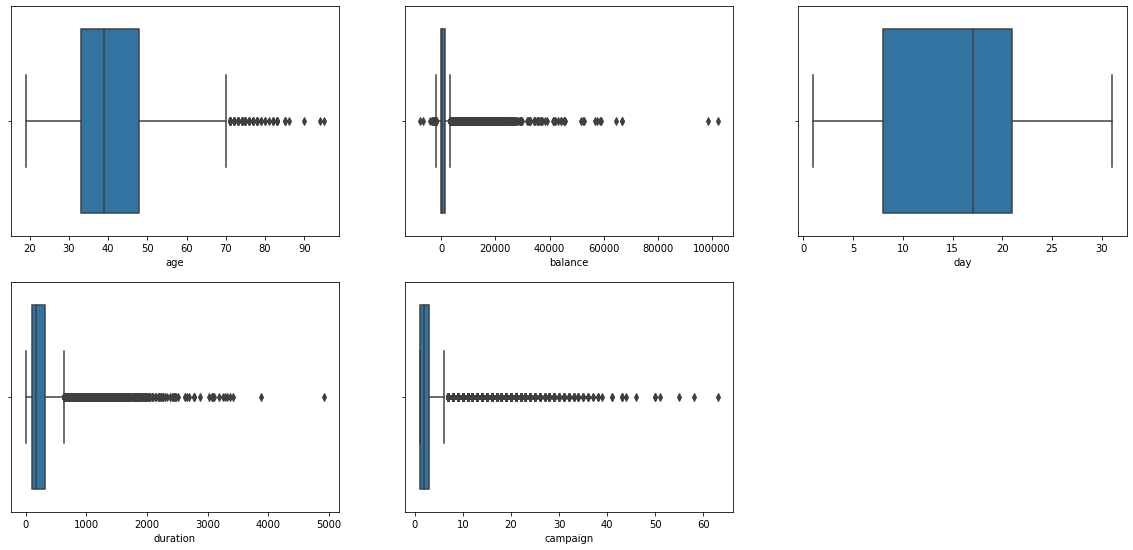

In [119]:
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for numerical_feature in numeric_list:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show();

- age , balance, duration and campaign have outlier values.

In [33]:
data.isnull().sum() # no missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [30]:
data["y"].value_counts() # highly imbalanced data

no     37104
yes     2896
Name: y, dtype: int64

# **Result of EDA**
- There is no missing values.
- age , balance, duration and campaign have outlier values.
- There is no multicollinearity between features.
- **default** feature seems to be does not play important role for data set, thus it will be removed.
- We will apply **stratified 5-fold cross validation**.
- Our evaluation metric will be **accuracy**


### 3-) Feature Engineering Part
- Drop unnecessary columns
- Handle outliers
- Handle categorical features
- Handle imbalanced data with using **SMOTE** method. **This technic will be use on train data while its training.**

In [86]:
df = data.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


#### Dropping unnecessary cols

In [87]:
df.groupby(["y", "default"]).size()

y    default
no   no         36344
     yes          760
yes  no          2847
     yes           49
dtype: int64

In [88]:
df.drop(['default'], axis=1, inplace=True)

#### removing outliers

In [89]:
df.groupby(["age"], sort=True)['age'].count()

age
19     12
20     22
21     39
22     71
23    149
     ... 
85      3
86      1
90      1
94      1
95      1
Name: age, Length: 70, dtype: int64

In [90]:
df.groupby(["y", "balance"], sort=True)['balance'].count()
# I will not remove these outliers because these show us client interest for dependent feature when balance goes high.

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   27624     1
      32685     1
      34646     1
      36252     1
      45248     1
Name: balance, Length: 8391, dtype: int64

In [91]:
df.groupby(["y", "duration"], sort=True)['duration'].count()
# I will not remove these outliers because these show us client interest for dependent feature when duration goes high.

y    duration
no   0           3
     1           1
     2           3
     3           4
     4           5
                ..
yes  3094        1
     3102        1
     3183        1
     3253        1
     3881        1
Name: duration, Length: 2505, dtype: int64

In [92]:
df.groupby(["y", "campaign"], sort=True)['campaign'].count()
# I can remove these feature's outliers

y    campaign
no   1           13454
     2           10393
     3            4618
     4            3075
     5            1547
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [93]:
df[(df['campaign'] < 13)]

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,1047,no,no,cellular,3,jun,342,1,no


In [94]:
df1 = df[df['campaign'] < 13] # drop outliers

In [95]:
df1.shape

(39164, 13)

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39164 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        39164 non-null  int64 
 1   job        39164 non-null  object
 2   marital    39164 non-null  object
 3   education  39164 non-null  object
 4   balance    39164 non-null  int64 
 5   housing    39164 non-null  object
 6   loan       39164 non-null  object
 7   contact    39164 non-null  object
 8   day        39164 non-null  int64 
 9   month      39164 non-null  object
 10  duration   39164 non-null  int64 
 11  campaign   39164 non-null  int64 
 12  y          39164 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.2+ MB


# Handling categorical features

In [97]:
categorical_cols = ["job","marital","education","contact","month"]
for col in  categorical_cols:
    df1 = pd.concat([df1.drop(col, axis=1),pd.get_dummies(df1[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [98]:
bool_cols = ['housing', 'loan', 'y']
for col in  bool_cols:
    df1[col+'_new']=df1[col].apply(lambda x : 1 if x == 'yes' else 0)
    df1.drop(col, axis=1, inplace=True)

In [99]:
df1.head()

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,housing_new,loan_new,y_new
0,58,2143,5,261,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,33,2,5,76,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,47,1506,5,92,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Save the pre processed data as csv

In [100]:
df1.to_csv('../input/pre-processed.csv', index=False)